### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [2]:
lista_alumnos = []

In [3]:
lista_edad_altura = [[29, 1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22, 1.82], [35, 1.79], [34, 1.90], [26, 1.78], [26, 1.64], [23, 1.74],[24, 1.85], [28, 1.75], [23, 1.83],[32, 1.74], [34, 1.57], [27, 1.58],[38, 1.70],[22, 1.79]]


In [4]:
# Import the necessary libraries:
import pandas as pd 
import numpy as np 

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#Turn it into a df to see the info
df_edad_altura = pd.DataFrame(lista_edad_altura)
df_edad_altura

,0,1
0,29,1.66
1,22,1.83
2,31,1.80
3,27,1.75
4,22,1.82
5,35,1.79
6,34,1.90
7,26,1.78
8,26,1.64
9,23,1.74


In [6]:
#See the correlation
df_edad_altura.corr()

,0,1
0,1.000000,-0.248752
1,-0.248752,1.000000


<AxesSubplot:>

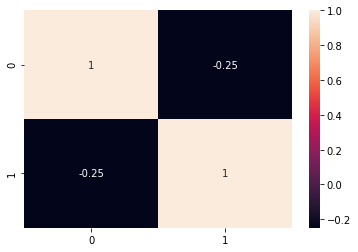

In [7]:
#Aquí se observa que los datos presentan una correlación cercana a cero

sns.heatmap(df_edad_altura.corr(), annot=True)

In [8]:
#Check the array shape
array_edad_altura = np.array(lista_edad_altura)
array_edad_altura.shape

(18, 2)

In [9]:
X = df_edad_altura[0]
print('X shape:', X.shape)

# Target -->y

y = df_edad_altura[1]
print('y shape:', y.shape)


X shape: (18,)
y shape: (18,)


In [18]:
# turning X into an array and reshaping it to make it a matrix
X = np.array(X).reshape(-1, 1)
print('X shape:', X.shape)

X shape: (18, 1)


array([1.66, 1.83, 1.8 , 1.75, 1.82, 1.79, 1.9 , 1.78, 1.64, 1.74, 1.85,
       1.75, 1.83, 1.74, 1.57, 1.58, 1.7 , 1.79])

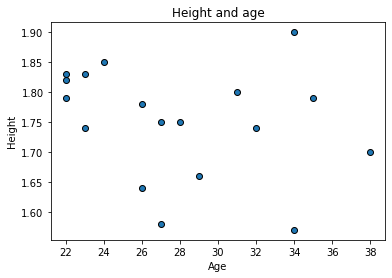

In [11]:
# First view of the plot
plt.scatter(X, y, edgecolor='black')
plt.title('Height and age')
plt.ylabel('Height')
plt.xlabel('Age')
plt.show()

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

lin_reg = LinearRegression(n_jobs=-1)

lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
print('LinearRegression coef:', lin_reg.coef_)
print('\nLinearRegression intercept:', lin_reg.intercept_)

LinearRegression coef: [-0.00147837]

LinearRegression intercept: 1.796077506663933


In [14]:
print('X_train prediction:\n\n', lin_reg.predict(X_train))

X_train prediction:

 [1.75320484 1.73989953 1.76207505 1.74433463 1.76059668 1.76355341
 1.75763994 1.76207505 1.76355341 1.74876974 1.75763994 1.75616157
 1.745813   1.75468321]


In [15]:
predictions = lin_reg.predict(X_val)
predictions

array([1.75616157, 1.745813  , 1.76355341, 1.7502481 ])

In [20]:
def show_sklearn_metrics(y_test, predictions):
    '''
    @leosanchezsoler
    Prints significant loss functions in order to see our model error
        Arguments:
            - y_test: the target test set
            - predictions: our prediction model
        Prints:
            - MAE (Mean Absolute Error): the average error
            - MSE (Mean Squared Error): 'punishes' larger errors. More useful in the real world
            - RMSE (Root Mean Squared Error): is interpretable in the 'y' units
    '''
    print('MAE:', mean_absolute_error(y_test, predictions))
    print('\nMSE:', mean_squared_error(y_test, predictions))
    print('\nRMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

show_sklearn_metrics(y_test=y_val, predictions=predictions)

MAE: 0.0745432643018249

MSE: 0.009459643978596872

RMSE: 0.09726070110068544


In [201]:
# Let's grab predictions from our test and see how well it did

train_score = lin_reg.score(X_train, y_train) * 100
test_score = lin_reg.score(X_val, y_val) * 100
print('Train score:', train_score)
print('\nTest score:', test_score)

Train score: 0.7663406565476039

Test score: 6.973384353073175


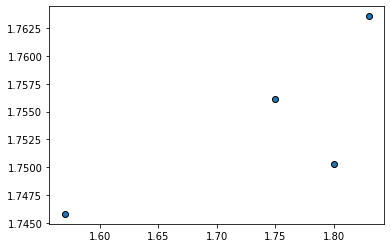

In [202]:
plt.scatter(y_val, predictions, edgecolor='black')

<AxesSubplot:xlabel='1', ylabel='Density'>

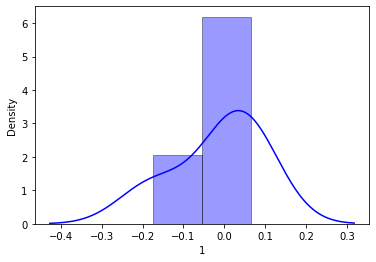

In [203]:
sns.distplot((y_val - predictions), bins=2, hist_kws=dict(edgecolor='black', linewidth=1), color='b')

In [204]:
# Ahora vamos a comprobar qué sucede si multiplicamos la edad por 2

X = X * 2
print('Edad multiplicada por 2\n', X)

Edad multiplicada por 2
 [[58]
 [44]
 [62]
 [54]
 [44]
 [70]
 [68]
 [52]
 [52]
 [46]
 [48]
 [56]
 [46]
 [64]
 [68]
 [54]
 [76]
 [44]]


In [205]:
X = np.array(X).reshape(-1, 1)
X.shape

(18, 1)

In [206]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=200)

In [207]:
lin_reg.fit(X_train, y_train)
print('Intercept:', lin_reg.intercept_)
print('\nCoef:', lin_reg.coef_)

print('\nTrain score:', lin_reg.score(X_train, y_train))
print('Test score:', lin_reg.score(X_val, y_val))

Intercept: 1.9538487834305251

Coef: [-0.00337322]

Train score: 0.17366895638349966
Test score: -1.2582129671945452


In [208]:
predictions = lin_reg.predict(X_val)
predictions

array([1.77844158, 1.737963  , 1.71772371, 1.77169515])

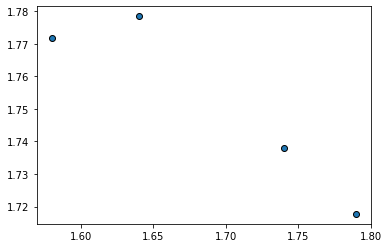

In [209]:
plt.scatter(y_val, predictions, edgecolor='black')
plt.show()

In [210]:
#Finalmente hago lo mismo con la altura multiplicada por 2
#Vuelvo a asignar X a su valor original
X = np.array(df_edad_altura[0]).reshape(-1, 1)
y = y * 2

In [211]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4)
lin_reg.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [212]:
predictions = lin_reg.predict(X_val)
predictions

array([3.54831736, 3.47196627, 3.53304714, 3.54068225, 3.54831736,
       3.51777693, 3.51014182, 3.50250671])

In [213]:
print('Score sobre el conjunto de entrenamiento:', lin_reg.score(X_train, y_train))
print('\nScore sobre el conjunto de test', lin_reg.score(X_val, y_val))

Score sobre el conjunto de entrenamiento: 0.03399753576675002

Score sobre el conjunto de test 0.12788719028792916


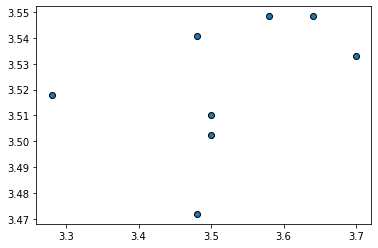

In [214]:
plt.scatter(y_val, predictions, edgecolor='black')
plt.show()

In [215]:
show_sklearn_metrics(y_test=y_val, predictions=predictions)

MAE: 0.0761824453813722

MSE: 0.012209579335969015

RMSE: 0.11049696527945468


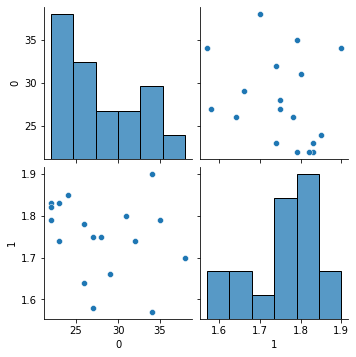

In [216]:
sns.pairplot(df_edad_altura)